In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.shape, test_data.shape

((17480, 16), (15081, 15))

In [22]:
train_data.head(10)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,0,309513,0,12,0,0,0,0,0,0,0,40,0,0.0
1,1,33,0,205469,1,10,0,1,0,0,0,0,0,40,0,1.0
2,2,46,0,149949,1,10,0,0,0,0,0,0,0,40,0,0.0
3,3,23,0,193090,2,13,1,2,1,0,1,0,0,30,0,0.0
4,4,55,0,60193,3,9,2,2,2,0,1,0,0,40,0,0.0
5,5,33,0,41610,2,13,0,3,0,0,0,0,0,40,0,0.0
6,6,40,1,40024,4,15,0,3,0,0,0,0,0,38,0,1.0
7,7,45,0,114797,3,9,3,4,3,1,1,0,0,40,0,0.0
8,8,17,2,39815,5,6,1,5,1,0,1,0,0,25,0,0.0
9,9,35,0,107991,6,7,1,6,2,0,0,0,0,45,0,0.0


In [5]:
train_test_data = pd.concat([train_data, test_data])

In [6]:
train_test_data.shape

(32561, 16)

In [7]:
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32561 non-null  int64  
 1   age             32561 non-null  int64  
 2   workclass       30725 non-null  object 
 3   fnlwgt          32561 non-null  int64  
 4   education       32561 non-null  object 
 5   education.num   32561 non-null  int64  
 6   marital.status  32561 non-null  object 
 7   occupation      30718 non-null  object 
 8   relationship    32561 non-null  object 
 9   race            32561 non-null  object 
 10  sex             32561 non-null  object 
 11  capital.gain    32561 non-null  int64  
 12  capital.loss    32561 non-null  int64  
 13  hours.per.week  32561 non-null  int64  
 14  native.country  31978 non-null  object 
 15  target          17480 non-null  float64
dtypes: float64(1), int64(7), object(8)
memory usage: 4.2+ MB


In [8]:
object_columns = train_test_data.dtypes[train_test_data.dtypes == 'object'].index.tolist()

for column in object_columns:
    train_test_data[column] = pd.factorize(train_test_data[column])[0]

In [9]:
train_test_data.head(10)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,0,309513,0,12,0,0,0,0,0,0,0,40,0,0.0
1,1,33,0,205469,1,10,0,1,0,0,0,0,0,40,0,1.0
2,2,46,0,149949,1,10,0,0,0,0,0,0,0,40,0,0.0
3,3,23,0,193090,2,13,1,2,1,0,1,0,0,30,0,0.0
4,4,55,0,60193,3,9,2,2,2,0,1,0,0,40,0,0.0
5,5,33,0,41610,2,13,0,3,0,0,0,0,0,40,0,0.0
6,6,40,1,40024,4,15,0,3,0,0,0,0,0,38,0,1.0
7,7,45,0,114797,3,9,3,4,3,1,1,0,0,40,0,0.0
8,8,17,2,39815,5,6,1,5,1,0,1,0,0,25,0,0.0
9,9,35,0,107991,6,7,1,6,2,0,0,0,0,45,0,0.0


In [10]:
train_test_data = train_test_data.fillna(-999)

In [11]:
train_data = train_test_data[train_test_data['target'] != -999]
test_data = train_test_data[train_test_data['target'] == -999]
test_data = test_data.drop('target', axis=1)
train_data.shape, test_data.shape

((17480, 16), (15081, 15))

In [12]:
ftr_train = train_data.drop(['id', 'target'], axis=1)
target_train = train_data['target']

In [13]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_train, target_train, test_size = 0.3, random_state=2022)
train_x.shape, valid_x.shape

((12236, 14), (5244, 14))

In [14]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
       eval_metric='auc')

[1]	training's auc: 0.902525	training's binary_logloss: 0.501256	valid_1's auc: 0.897079	valid_1's binary_logloss: 0.503016
[2]	training's auc: 0.905841	training's binary_logloss: 0.469035	valid_1's auc: 0.901008	valid_1's binary_logloss: 0.472082
[3]	training's auc: 0.9104	training's binary_logloss: 0.443372	valid_1's auc: 0.904241	valid_1's binary_logloss: 0.4479
[4]	training's auc: 0.912381	training's binary_logloss: 0.421896	valid_1's auc: 0.905955	valid_1's binary_logloss: 0.427594
[5]	training's auc: 0.913357	training's binary_logloss: 0.404144	valid_1's auc: 0.906726	valid_1's binary_logloss: 0.410699
[6]	training's auc: 0.916133	training's binary_logloss: 0.38954	valid_1's auc: 0.908082	valid_1's binary_logloss: 0.396789
[7]	training's auc: 0.917095	training's binary_logloss: 0.376921	valid_1's auc: 0.909882	valid_1's binary_logloss: 0.384379
[8]	training's auc: 0.918075	training's binary_logloss: 0.365899	valid_1's auc: 0.909836	valid_1's binary_logloss: 0.374522
[9]	training'

[81]	training's auc: 0.958241	training's binary_logloss: 0.224655	valid_1's auc: 0.925674	valid_1's binary_logloss: 0.28002
[82]	training's auc: 0.958389	training's binary_logloss: 0.224272	valid_1's auc: 0.925738	valid_1's binary_logloss: 0.279897
[83]	training's auc: 0.958644	training's binary_logloss: 0.223787	valid_1's auc: 0.925831	valid_1's binary_logloss: 0.279723
[84]	training's auc: 0.9588	training's binary_logloss: 0.223333	valid_1's auc: 0.92589	valid_1's binary_logloss: 0.27957
[85]	training's auc: 0.959105	training's binary_logloss: 0.222696	valid_1's auc: 0.925835	valid_1's binary_logloss: 0.279626
[86]	training's auc: 0.959293	training's binary_logloss: 0.222175	valid_1's auc: 0.926013	valid_1's binary_logloss: 0.279303
[87]	training's auc: 0.959569	training's binary_logloss: 0.221655	valid_1's auc: 0.925933	valid_1's binary_logloss: 0.279415
[88]	training's auc: 0.959797	training's binary_logloss: 0.221178	valid_1's auc: 0.925896	valid_1's binary_logloss: 0.279363
[89]	

LGBMClassifier()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

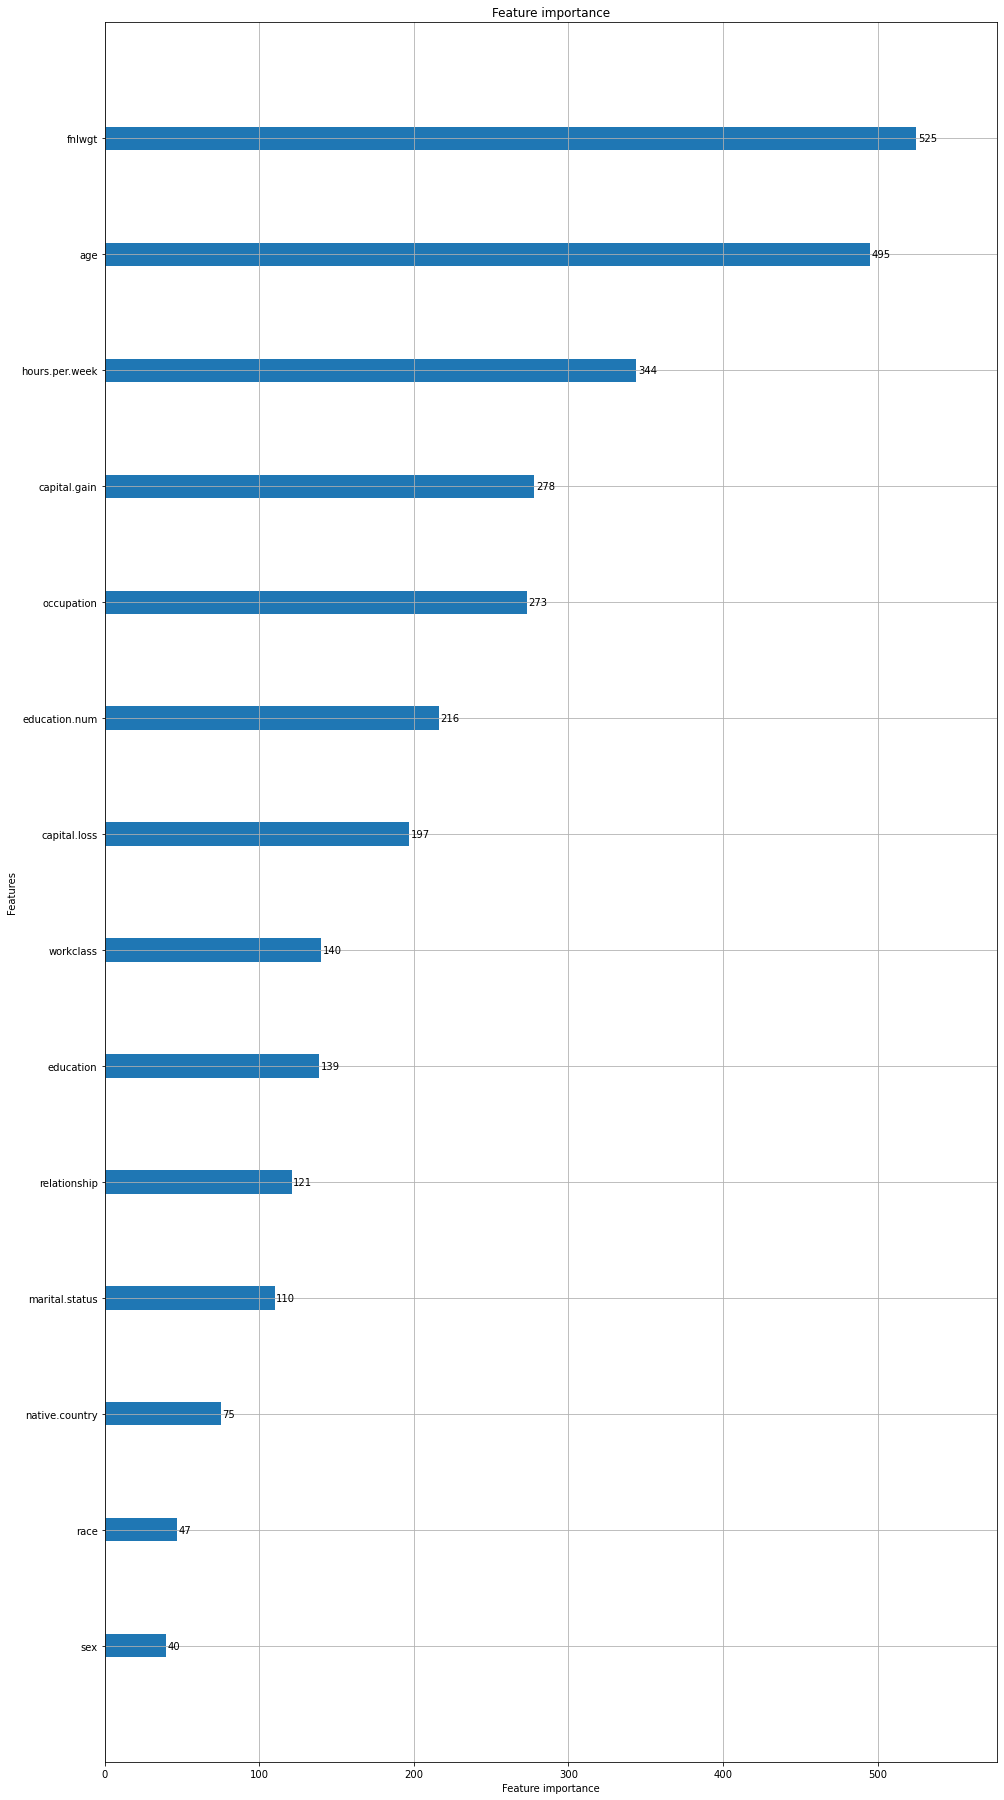

In [15]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [16]:
preds = clf.predict_proba(test_data.drop(['id'], axis=1))[:, 1]

In [17]:
for i in range(len(preds)):
    if preds[i] > 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

In [18]:
test_data['target'] = preds

In [19]:
test_data.head(10)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,47,0,304133,1,10,0,1,0,0,0,0,0,45,0,1.0
1,1,34,4,154227,1,10,1,6,2,0,0,0,0,75,0,0.0
2,2,31,2,158291,2,13,1,0,2,0,0,8614,0,40,0,1.0
3,3,28,0,183155,2,13,0,3,0,0,0,0,0,55,0,1.0
4,4,54,2,182543,1,10,6,2,3,0,1,0,0,40,2,0.0
5,5,24,0,88676,3,9,1,5,1,0,0,0,0,35,0,0.0
6,6,33,2,254935,1,10,0,11,0,0,0,0,0,45,0,0.0
7,7,27,1,340269,1,10,1,11,2,0,0,0,0,40,0,0.0
8,8,35,0,296478,1,10,0,6,0,0,0,0,0,40,0,0.0
9,9,39,0,706180,2,13,2,6,3,0,1,0,0,40,0,0.0


In [20]:
test_data[['id', 'target']].to_csv('data_preprocessing.csv', index=False)